In [283]:
import math

import numba
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Project code
from bayesian_optimizer import BayesianOptimizer, AcquisitionFunc

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Optimize a 1D Test function:

Iter: Init 1, Value: -0.0, x: [0.]
Iter: Init 2, Value: -0.002728994348890417, x: [0.07142857]
Iter: Init 3, Value: -0.004661040178617011, x: [0.14285714]
Iter: Init 4, Value: -5.5745739697383365e-06, x: [0.21428571]
Iter: Init 5, Value: -0.07009692031542093, x: [0.28571429]
Iter: Init 6, Value: -0.007493074717392847, x: [0.35714286]
Iter: Init 7, Value: -0.0012254248256069909, x: [0.42857143]
Iter: Init 8, Value: -0.25, x: [0.5]
Iter: Init 9, Value: -0.002178533023301334, x: [0.57142857]
Iter: Init 10, Value: -0.02427756208435223, x: [0.64285714]
Iter: Init 11, Value: -0.4381057519713819, x: [0.71428571]
Iter: Init 12, Value: -7.494705003759437e-05, x: [0.78571429]
Iter: Init 13, Value: -0.16779744643021183, x: [0.85714286]
Iter: Init 14, Value: -0.46120004496248357, x: [0.92857143]
Iter: Init 15, Value: -5.270904363473971e-92, x: [1.]
x0: [0.99106999]
f_best:  -0.46120004496248357
ACQ:  [[0.99106999]] 0.9999999942058335
f_best:  -0.46120004496248357
ACQ:  [[0.99107]] 0.99999999420583

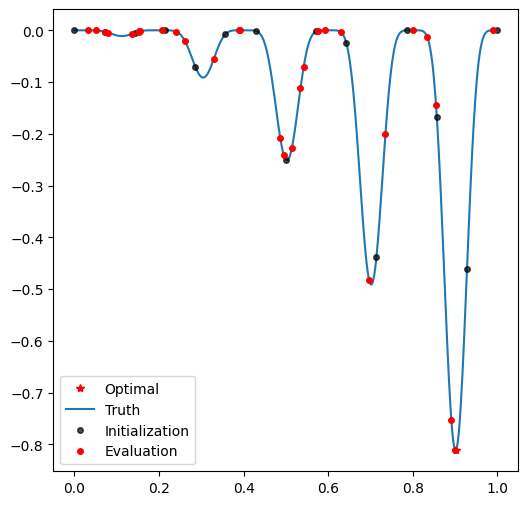

[[0.99106999]
 [0.07921817]
 [0.15451468]
 [0.20704207]
 [0.13610722]
 [0.48698566]
 [0.24017326]
 [0.32925393]
 [0.03084004]
 [0.5345866 ]
 [0.49519561]
 [0.0721898 ]
 [0.05078828]
 [0.15153458]
 [0.5143234 ]
 [0.59190586]
 [0.2606104 ]
 [0.39073187]
 [0.54217687]
 [0.85520857]
 [0.62979431]
 [0.90099819]
 [0.57676995]
 [0.69686332]
 [0.83446698]
 [0.73559584]
 [0.38847498]
 [0.80018612]
 [0.89142816]
 [0.15300158]]
[[0.99106999]
 [0.07921817]
 [0.15451468]
 [0.20704207]
 [0.13610722]
 [0.48698566]
 [0.24017326]
 [0.32925393]
 [0.03084004]
 [0.5345866 ]
 [0.49519561]
 [0.0721898 ]
 [0.05078828]
 [0.15153458]
 [0.5143234 ]
 [0.59190586]
 [0.2606104 ]
 [0.39073187]
 [0.54217687]
 [0.85520857]
 [0.62979431]
 [0.90099819]
 [0.57676995]
 [0.69686332]
 [0.83446698]
 [0.73559584]
 [0.38847498]
 [0.80018612]
 [0.89142816]
 [0.15300158]]


In [284]:
@numba.jit
def test_function(x, sigma=0.1):
    # Add some noise to make this function hard to optimize
    noise = np.random.normal(loc=0, scale=sigma)
    # return x**2
    return -1 * (x**2 * np.sin(5 * np.pi * x)**6.0)


# Run the optimizer
bounds = [(0, 1)]
optimizer = BayesianOptimizer(
    lambda x1: test_function(x1), 30, 15, bounds, AcquisitionFunc.EI, debug=True)
optimal = optimizer.minimize()

# grid-based sample of the domain [0,1]
X = np.linspace(0, 1, 500)
# sample the domain without noise
y = [test_function(x) for x in X]
# sample the domain with noise
ynoise = [test_function(x) for x in X]
# Find best result
ix = np.argmin(y)

# Plot the function and data
fig = plt.figure(figsize=(6, 6))
# Plot the optimum
plt.plot(X[ix], y[ix], "*r", label="Optimal")
# plot the points without noise
plt.plot(X, y, label="Truth")
# Plot the optimzer's initialization points
opt_x_init = optimizer.x_init.reshape(-1, 1)
plt.plot(opt_x_init, test_function(opt_x_init), "ok", ms=4, alpha=0.7, label="Initialization")
# Plot the optimizer's evaluation points
opt_x = optimizer.x_eval.reshape(-1, 1)
plt.plot(opt_x, test_function(opt_x), "or", ms=4, alpha=1, label="Evaluation")
plt.legend()
plt.show()

print(opt_x)
print(optimizer.x_eval)


## Optimize the Branin Hoo Function

In [285]:
@numba.jit
def branin_hoo_function(x1, x2):
    # SEE: https://statisticaloddsandends.wordpress.com/2019/06/24/test-functions-for-optimization-and-the-branin-hoo-function/
    a = 1
    b = 5.1 / (4 * math.pi**2)
    c = 5 / math.pi
    r = 6
    s = 10
    t = 1 / (8 * math.pi)
    return a * (x2 - b*x1**2 + c*x1 - r)**2 + s*(1-t)*math.cos(x1) + s


In [286]:
bounds = [(-5, 10), (0, 15)]
optimizer = BayesianOptimizer(
    lambda x1, x2: -1 * branin_hoo_function(x1, x2), 50, 5, bounds, 1, 20)
optimal = optimizer.maximize()
optimizer.print_results()


AttributeError: 'BayesianOptimizer' object has no attribute 'maximize'